In [1]:
#Librerias a utlilzar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Aqui importo el dataset
path = 'heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Necesitamos cambiar la salida de target por valores no numericos que representen la misma informacion
#por lo tanto 1 = positivo y 0= negativo
##Ademas procedermeos a elimnar que no considero importantes para esta practica
df.target = df.target.replace({1: "positivo", 0: "negativo"})
df.drop(['sex', 'fbs', 'restecg','exang','slope','ca','thal','cp','oldpeak'], axis=1,inplace=True) 

In [4]:
df.head()

,age,trestbps,chol,thalach,target
0,63,145,233,150,positivo
1,37,130,250,187,positivo
2,41,130,204,172,positivo
3,56,120,236,178,positivo
4,57,120,354,163,positivo


In [5]:
#Normalizamos los datos
#Caracteristicas en X  
#target en  y
from sklearn.preprocessing import StandardScaler 
features = ['age', 'trestbps','chol','thalach'] 

x = df.loc[:, features].values

y = df.loc[:,['target']].values



In [6]:
x = StandardScaler().fit_transform(x)

In [7]:
y

array([['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['posi

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)



In [9]:
componentes = pca.fit_transform(x)

In [10]:
componentes

array([[-8.71901634e-01,  6.10938164e-02],
       [ 2.10926360e+00,  1.28334567e+00],
       [ 1.79380479e+00,  2.52657325e-01],
       [ 8.49812120e-01,  3.69971876e-01],
       [-3.34069218e-01,  1.36263477e+00],
       [-7.62265604e-02, -5.34068023e-01],
       [-5.71748477e-01,  8.53671346e-01],
       [ 1.44834059e+00,  7.12820496e-01],
       [-2.38554910e-01,  7.85936180e-01],
       [ 4.01206283e-01,  1.49405441e-01],
       [ 9.35681383e-02,  4.11273233e-01],
       [ 8.82145465e-02,  9.20196031e-02],
       [ 7.68960652e-01,  8.70089597e-01],
       [-6.66684401e-02, -1.23587803e+00],
       [-6.97596940e-01,  1.19015025e+00],
       [ 9.71829527e-01, -3.19807471e-01],
       [-1.19480727e-01,  1.43331999e+00],
       [-1.95197735e+00, -9.54044249e-01],
       [ 8.45289878e-01,  1.20376172e+00],
       [-1.21003704e+00, -3.78825728e-02],
       [-9.75740225e-02,  1.92282114e-01],
       [ 1.53140051e+00,  7.61188022e-01],
       [ 1.45735627e+00,  9.17076192e-01],
       [-1.

In [11]:
principalDf = pd.DataFrame(data = componentes
             , columns = ['C1', 'C2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1) 
#Aui se juntan el target y los dos componentes
finalDf


,C1,C2,target
0,-0.871902,0.061094,positivo
1,2.109264,1.283346,positivo
2,1.793805,0.252657,positivo
3,0.849812,0.369972,positivo
4,-0.334069,1.362635,positivo
...,...,...,...
298,-0.944732,-0.644388,negativo
299,0.724213,-0.683872,negativo
300,-1.146182,-0.765574,negativo
301,-0.140677,-2.442790,negativo


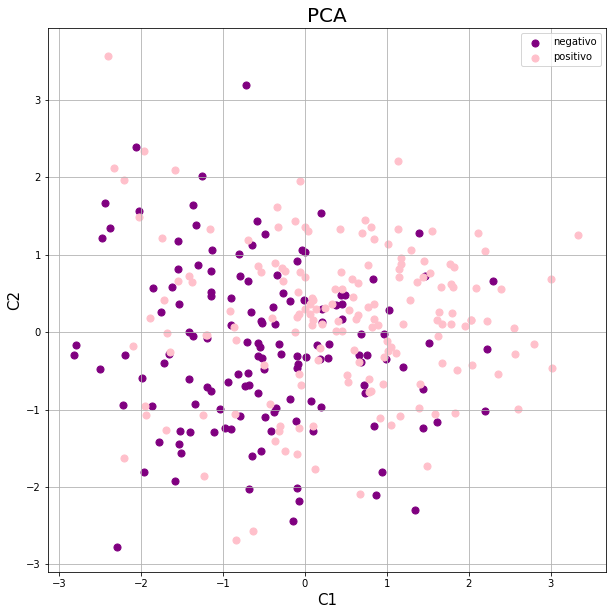

In [17]:
#Graficamos el resultado obtenido
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['negativo', 'positivo']
colors = ['purple', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'C1']
               , finalDf.loc[indicesToKeep, 'C2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()